# Table of Contents

1. [Multi-class Classification](#multi-class)
    1. [Dataset](#dataset)
    2. [Visualizing the data](#visualizing)
    3. [Vectorizing Logistic Regression](#vectorizing)
        1. [Vectorizing the cost function](#vectorizing-cost)
        2. [Vectorizing the gradient](#vectorizing-gradient)
        3. [Vectorizing regularized logistic regression](#vectorizing-logreg)
    4. [One-vs-all Classification](#one-vs-all)
        1. [One-vs-all Prediction](#one-vs-pred)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

In [2]:
# Setup the parameters you will use for this part of the exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
num_labels = 10          # 10 labels, from 1 to 10

<div id='multi-class'/>

## 1. Multi-class Classification

<div id='dataset'/>

### 1.1 Dataset

In [3]:
# import the data set
from scipy.io import loadmat

data_directory = '../../../Documents/Machine-Learning/Week 4/01. Data/'
file = 'ex3data1.mat'

mat = loadmat(data_directory+file)

In [4]:
# convert to Pandas data frame

examples = mat['X']
target = mat['y']

df = pd.DataFrame(np.concatenate([examples, target], axis=1))

# add a column of ones for the intercept
df.insert(0, 'int', 1)

In [5]:
df.head()

,int,0,1,2,3,4,5,6,7,8,...,391,392,393,394,395,396,397,398,399,400
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0


<div id='visualizing'/>

### 1.2 Visualizing the data

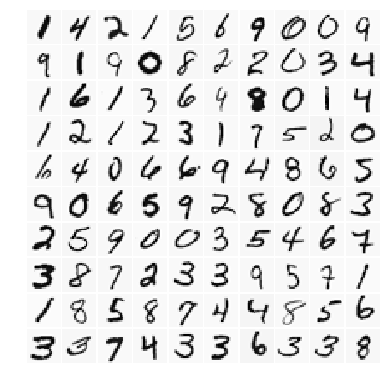

In [6]:
dim = 10

m, n = df.iloc[:,1:-1].shape

# generate random sample from the data set to plot
to_plot = df.iloc[:,1:-1].loc[np.random.choice(m, size=dim * dim, replace = False)]

# visualize the numbers
fig = plt.figure(figsize=(5, 5))

gs = gridspec.GridSpec(dim, dim)
gs.update(bottom=0.01, top=0.99, left=0.01, right=0.99, 
          hspace=0.05, wspace=0.05)

indeces = list(to_plot.index.values)

k=0

for i in range(dim):
    for j in range(dim):
        ax = plt.subplot(gs[i, j])
        ax.axis('off')
        ax.imshow(to_plot.loc[indeces[k]].values.reshape(int(np.sqrt(n)), int(np.sqrt(n))).T,
            cmap = plt.get_cmap('Greys'), interpolation = 'nearest')
        k += 1

<div id='vectorizing'/>

### 1.3 Vectorizing Logistic Regression

<div id='vectorizing-cost'/>

#### 1.3.1 Vectorizing the cost function

In [7]:
# define the sigmiod function

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return(g)

# define the cost function

def costFunction(theta, x, y):
    m = len(y)
    z = x @ theta
    h = sigmoid(z)
    J = 1/m * ( -1*y*np.log(h) - ((1-y)*np.log(1-h))).sum()
    return(J)

In [8]:
# perform a test to check if the functions work well

theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[ np.ones((5,1)), np.reshape(np.array([range(1,16)]),(5,3), order = 'F')/10 ]
y_t = np.array([1,0,1,0,1]) >= 0.5

cost_t = costFunction(theta_t, X_t, y_t)

print('The test cost is {}'.format(cost_t))
print('Expected cost is 0.73482')

The test cost is 0.7348193961097442
Expected cost is 0.73482


<div id='vectorizing-gradient'/>

#### 1.3.2 Vectorizing the gradient

In [9]:
# define the gradient

def gradient(theta, x, y):
    m = len(y)
    z = x @ theta
    h = sigmoid(z)
    beta = h-y
    grad = 1/m * np.transpose(x) @ beta
    return(grad)

In [10]:
# perform a test to check if the function works well

gradient_t = gradient(theta_t, X_t, y_t)

print('The values of the gradient are: {}'.format(gradient_t))
print('The expected gradient values are: 0.146561, 0.051442, 0.124722, 0.198003')

The values of the gradient are: [0.14656137 0.05144159 0.12472227 0.19800296]
The expected gradient values are: 0.146561, 0.051442, 0.124722, 0.198003


<div id='vectorizing-logreg'/>

#### 1.3.3 Vectorizing regularized logistic regression

In [11]:
def costFunctionReg(theta, x, y, lam):
    m = len(y)
    z = x @ theta
    h = sigmoid(z)
    J = 1/m * ( -1*y*np.log(h) - ((1-y)*np.log(1-h))).sum() + lam/(2*m) * sum(np.power(theta[1:],2))
    return(J)


def gradientReg(theta, x, y, lam):
    m = len(y)
    n = x.shape[1]
    z = x @ theta
    h = sigmoid(z)
    h = h.reshape(-1,1)
    beta = h - y.reshape(-1,1)
    beta = beta.reshape(-1,1)
    er = (np.transpose(x) @ beta)
    er = er.reshape(n,1)
    reg = np.append(0, lam/m * theta[1:]).reshape(-1,1)
    grad = 1/m * er + reg
    grad = grad.reshape(n,)
    return(grad)

In [12]:
# perform some test to check the implementation

theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[ np.ones((5,1)), np.reshape(np.array([range(1,16)]),(5,3), order = 'F')/10 ]
y_t = np.array([1,0,1,0,1]) >= 0.5
lambda_t = 3

cost_t = costFunctionReg(theta_t, X_t, y_t, lambda_t)

print("The test cost is: {}".format(cost_t))
print("The expected cost is: 2.534819")

The test cost is: 2.534819396109744
The expected cost is: 2.534819


In [13]:
# test the gradient values

grad_t = gradientReg(theta_t, X_t, y_t, lambda_t)

print("Gradients: {}".format(grad_t))
print("Expected gradients: 0.146561, -0.548558, 0.724722, 1.398003")

Gradients: [ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients: 0.146561, -0.548558, 0.724722, 1.398003


<div id='one-vs-all'/>

## 1.4 One-vs-all Classification

In [14]:
pd.DataFrame(examples).head()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
pd.DataFrame(examples).tail()

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def oneVsAll(x, y, num_labels, lam):
    from scipy.optimize import minimize
    m = x.shape[0]
    n = x.shape[1]
    
    #add ones to the data frame
    x = np.c_[ np.ones((m,1)), x]
    
    #set up initial values for theta matrix
    initial_theta = np.zeros((n + 1))          
   
    #create the empty matrix to fill in the optimization loop
    all_teta = np.zeros((num_labels, n+1), dtype=np.float64)
    
    #perform optimization
    for i in range(num_labels):
        y_i = np.array([1 if elem == i else 0 for elem in y])
        fmin = minimize(fun=costFunctionReg, 
                        x0=initial_theta, 
                        args=(x, y_i, lam), 
                        method='CG', 
                        jac=gradientReg,
                       options= {'disp': True, 
                                 'gtol': 1e-05,
                                 'maxiter': 350})
        all_teta[i] = fmin.x
    return(all_teta)

In [17]:
#replace the digit labeled with 10 for 0 with 0 
target[target == 10] = 0

lam = 0.1

# check the function
result = oneVsAll(examples, target, num_labels, lam)

Optimization terminated successfully.
         Current function value: 0.008571
         Iterations: 119
         Function evaluations: 459
         Gradient evaluations: 459
Optimization terminated successfully.
         Current function value: 0.013120
         Iterations: 117
         Function evaluations: 449
         Gradient evaluations: 449
Optimization terminated successfully.
         Current function value: 0.050816
         Iterations: 244
         Function evaluations: 742
         Gradient evaluations: 742
Optimization terminated successfully.
         Current function value: 0.057610
         Iterations: 237
         Function evaluations: 700
         Gradient evaluations: 700
Optimization terminated successfully.
         Current function value: 0.033111
         Iterations: 183
         Function evaluations: 593
         Gradient evaluations: 593
Optimization terminated successfully.
         Current function value: 0.054486
         Iterations: 216
         Function ev

<div id='one-vs-pred'/>

### 1.4.1 One-vs-all Prediction

In [18]:
def predictOneVsAll(theta, x):
    m = x.shape[0]
    num_labels = theta.shape[0]
    
    #create the empty vector to store the predicted label
    p = np.zeros((m, 1))
    
    #add ones to the data frame
    x = np.c_[ np.ones((m,1)), x]

    prob = x @ np.transpose(theta)
    
    for i in range(m):
        p[i] = np.argmax(prob[i,:])
        
    return(p)   

In [19]:
p = predictOneVsAll(result, examples)

In [20]:
def accuracy(real, predictions):
    acc = np.mean(predictions == real)
    return(acc)

In [21]:
print("The accuracy of the logistic regression is {}%".format(round(accuracy(p,target)*100,2)))

The accuracy of the logistic regression is 96.42%
